<a href="https://colab.research.google.com/github/royaad/AIC/blob/main/%5BSolutionV2%5D_Project_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2023, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, TimeDistributed, RepeatVector, Bidirectional, Dropout
from keras.callbacks import EarlyStopping
from nltk.translate.bleu_score import sentence_bleu

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
#Test Your Zaka
#cloning git repo
!git clone https://github.com/royaad/AIC
#changing working directory
%cd AIC/Week_08/data

Cloning into 'AIC'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 75 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), 7.58 MiB | 3.93 MiB/s, done.
/content/AIC/Week_08/data


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
#specifying the filenames
filename_1 = 'en.csv'
#reading the files with read_csv
English_df = pd.read_csv(filename_1, header=None)
English_df.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
#Test Your Zaka (French)
#specifying the filenames
filename_2 = 'fr.csv'
#reading the files with read_csv
French_df = pd.read_csv(filename_2, header=None)
French_df.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
nrows_1, ncols_1 = English_df.shape
print(f"We have {nrows_1} sentences for English")
nrows_2, ncols_2 = French_df.shape
print(f"We have {nrows_2} sentences for French")

We have 137860 sentences for English
We have 137860 sentences for French


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
df = pd.concat([English_df, French_df],axis=1,ignore_index=True)

Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
df.columns = ['English', 'French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
i=14
print(df.iloc[i,0])
print(df.iloc[i,1])

he dislikes grapefruit , limes , and lemons .
il n'aime pamplemousse , citrons verts et les citrons .


<u><b>N.B.</b></u>
We can see that the translation itself is not perfect. A more correct translation would be <b><i>il n'aime pas les pamplemousses, les citrons verts et les citrons</i></b>.

##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
def df_txt_cleaner(df):
  #we need to import string and re for this function
  nrows, ncols = df.shape
  #str.maketrans(x,y,z)
  #a 1-to-1 mapping between x and y
  #the third parameter in the mapping table describes characters that you want to remove from the string
  translation_table = str.maketrans("", "", string.punctuation)
  #looping over columns
  for i in range(ncols):
    #preserving hyphens and apostrophes between alphabetic characters
    #so words like états-unis would become états unis and not étatsunis
    #numeric characters are ignored
    df.iloc[:,i] = df.iloc[:,i].apply(lambda x: re.sub(r"(?<!\d)[- \'](?!\d)", ' ', x))
    #removing punctuations
    df.iloc[:,i] = df.iloc[:,i].apply(lambda x: x.translate(translation_table))
    #usually one must put words in lowercase.
    #but the sentences have been already treated.

  return df

In [ ]:
#Test Your Zaka
df = df_txt_cleaner(df)
df.head()

,English,French
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automn...
1,the united states is usually chilly during jul...,les états unis est généralement froid en juill...
2,california is usually quiet during march and ...,california est généralement calme en mars et ...
3,the united states is sometimes mild during jun...,les états unis est parfois légère en juin et ...
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Zaka
i=14
print(df.iloc[i,0])
print(df.iloc[i,1])

he dislikes grapefruit  limes  and lemons 
il n aime pamplemousse  citrons verts et les citrons 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
#Test Your Zaka
df['ENG Length'] = df['English'].str.split().str.len()
df['FR Length'] = df['French'].str.split().str.len()
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automn...,13,14
1,the united states is usually chilly during jul...,les états unis est généralement froid en juill...,15,14
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les états unis est parfois légère en juin et ...,14,14
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

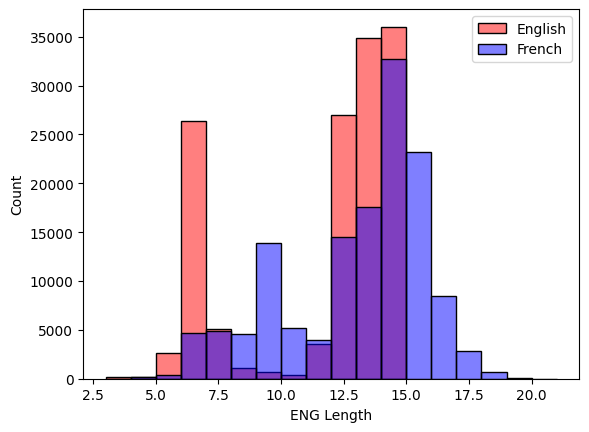

In [ ]:
#Test Your Zaka
#hist plots of the lengths of english sentences and french sentences
plt.figure()
sns.histplot(x='ENG Length', data=df, binwidth=1, color='r', alpha=.5)
sns.histplot(x='FR Length', data=df, binwidth=1, color='b', alpha=.5)
plt.legend(['English', 'French'])

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
#Test Your Zaka
ENG_max = df['ENG Length'].max()
FR_max = df['FR Length'].max()

print(f"The maximum length of an English sentence is: {ENG_max}")
print(f"The maximum length of a French sentence is: {FR_max}")

The maximum length of an English sentence is: 15
The maximum length of a French sentence is: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

**It is possible to use a single tokenizer to tokenize both English and French sentences. However, since English and French have different linguistic characteristics, using a language-specific tokenizer or a tokenizer trained specifically for each language may provide better results. Nonetheless, if we prefer using a single tokenizer, we can consider using a multilingual tokenizer or a tokenizer that supports multiple languages.**

Tokenize the sentences that we have.

In [ ]:
def Tokenization(sentences):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sentences)
  return tokenizer

In [ ]:
#Test Your Zaka
ENG_tokenizer = Tokenization(df.iloc[:, 0])
FR_tokenizer = Tokenization(df.iloc[:, 1])

**How many unique words do we have in english and in french?**

In [ ]:
#Test Your Zaka
ENG_vocab_size = len(ENG_tokenizer.word_index)
print('English Vocabulary Size: %d' %(ENG_vocab_size))
FR_vocab_size = len(FR_tokenizer.word_index)
print('French Vocabulary Size: %d' %(FR_vocab_size))

English Vocabulary Size: 200
French Vocabulary Size: 330


<b><u>N.B.</b></u>
- If we do not treat the hyphens (-) and apostrophies (') separately then the vocabulary count would be different. We would have 199 foe English and 344 for French.
- With the apostrophy (') treatment, the english vocab contains one additional vocab for "t" from the words isn't, aren't, didn't... but the French vocab contains ~10 words less as words like n'aime, l'oiseau, l'automne, l'automobile, l'orange... would be counted as unique words naime, loiseau, lautomne, lautomobile, lorange... without this treatment.
- The hyphen (-) treatment is also necessary for words like "états-unis" to become "états unis" rather than "étatsunis", which is more in agreement with the English "United States".






####Padding

**What should be the length of the sequences that we have after padding?**

In our case, we will be using a simple 1 RNN translator. Therefore, we are restrited to using the same length for inputs and outputs. And, since we have a maximum length of 15 for English and 21 for French, we will be taking padding all sentences to be 21 "words" long.

<u><b>N.B.</b></u> In case we use a deeper RNN model we can use different input and output lengths. You can see the extra example where we took a length of 15 for English and a length of 21 for French.

Perform padding on the sequences that we have.

In [ ]:
def Encoder(tokenizer, length, sentences):
  #integer encode sequences
  seq = tokenizer.texts_to_sequences(sentences)
  #pad sequences with 0 values
  seq = pad_sequences(seq, maxlen=length, padding='post')
  return seq

In [ ]:
#Test Your Zaka
#use the same length for both
trainX = Encoder(ENG_tokenizer, FR_max, df.iloc[:, 0])
trainY = Encoder(FR_tokenizer, FR_max, df.iloc[:, 1])

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
#Test Your Zaka
def baseline_1D_model(in_seq_length, out_seq_length, in_vocab_size, out_vocab_size):

  model = Sequential()
  '''
  - Embedding layer will create a vector for each index/word in our vocab.
    The layer will take a 2D array if shape (batch_size, input_length) and
    will return a 3D array of shape (batch_size, input_length, output_dim)
  - The input_dim should be equal to the vocab size (i.e. the number of vectors to be created)
    However, we should not forget to make place for special words like <sos>, <eos>, and <pad>
    In our case, we should add 1 for <pad> or the 0s
  - The input_length should be equal to the length of the padded seqences
  - The output_dim is the dimension of the embedding vector.
  '''
  embedding_dim = 256
  convec_dim = 256 #convec short for context vector
  model.add(Embedding(input_dim=in_vocab_size, output_dim=embedding_dim, input_length=in_seq_length))
  '''
  - We now have an encoder layer made of GRUs.
  - We usually use additional cells/units of RNNs
  - Each RNN will take an input shape (batch_size, input_length, output_dim)
    and return an array of (batch_size, 1).
    The collection of GRU units returns an array of shape (batch_size, units)
  - The array returned by the GRU is called thought or context vector.
  - if the return_sequence parameter is set to True, then the GRU, will return
    the output for each sequence in a unit.
    The output vector shape will be (batch_size, input_length, units).
  - Usually, return_sequence=True is required before the Dense layer used for classification.

  '''
  model.add(GRU(convec_dim, return_sequences=True))
  '''
  - Now, we need to classify the context vector into the output vocab.
    The classification problem of course requires a Dense layer.
    The Dense layer should have a number of nodes equal to the ouput vocab
    to classify each context vector into a French word.
    The activation is softmax as it is a multi-class classification.
  - The TimeDistributed is a wrapper that allows to apply a layer to every temporal slice of an input.
    The temporal slice is along axis 1.
    For example, in the case of the GRU, for return_sequence=True, the output shape is (batch_size, input_length, units).
    The temporal slice corresponds to the input length (the number of words).
    So, for the context vector of 'each word', we will do a classification.
    The output shape will be (batch_size, input_length, out_vocab_size)
    An argmax along axis 2 is required to fetch the encoded indices and reconstruct the French phraze.
  '''
  model.add(TimeDistributed(Dense(out_vocab_size, activation = 'softmax')))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
#the +1 is to account for the <pad>
model = baseline_1D_model(FR_max, FR_max, ENG_vocab_size+1, FR_vocab_size+1)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 21, 256)           51456     
                                                                 
 gru_2 (GRU)                 (None, 21, 256)           394752    
                                                                 
 time_distributed_3 (TimeDis  (None, 21, 331)          85067     
 tributed)                                                       
                                                                 
Total params: 531,275
Trainable params: 531,275
Non-trainable params: 0
_________________________________________________________________


Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keep in your mind that your model might take A LOT of time to train.

In [ ]:
#Test Your Zaka
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
training_history = model.fit(trainX, trainY, batch_size=1024, epochs=100, validation_split=0.2, verbose=0, callbacks=[es])

Epoch 50: early stopping


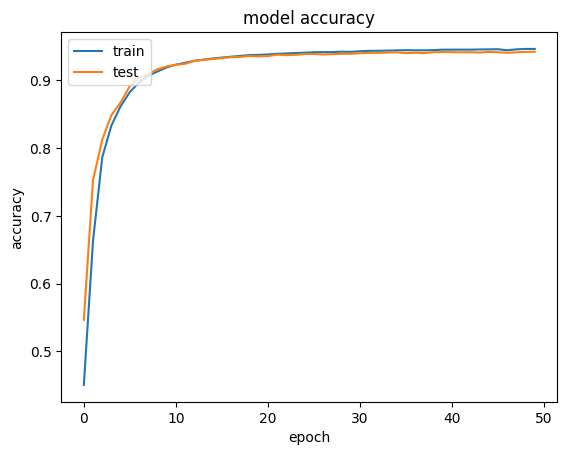

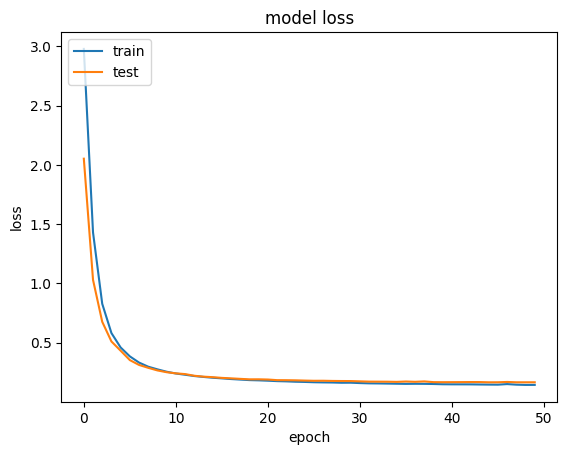

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
#Test Your Zaka
def EN_FR_Translator(in_sentence, Max_Length, model, in_tokenizer, out_tokenizer):
  #the [] is necessary to make the input a list then an array
  in_sentence = np.array([in_sentence])
  X = Encoder(in_tokenizer, Max_Length, in_sentence)
  Y = np.ravel(np.argmax(model.predict(X, verbose=0), axis=2))
  out_sentence = logits_to_text(Y, out_tokenizer)
  out_sentence = out_sentence.replace('<pad>', '')
  return out_sentence.strip()

def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = tokenizer.index_word
    index_to_words[0] = '<pad>'

    return ' '.join([index_to_words[prediction] for prediction in logits])

Test the following sentence

In [ ]:
input = "she is driving the truck"

#Test Your Zaka
print(input)
FR_translation = EN_FR_Translator(input, FR_max, model, ENG_tokenizer, FR_tokenizer)
print(FR_translation)

she is driving the truck
elle conduit au grande camion


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
#Test Your Zaka
def baseline_BiD_model(in_seq_length, out_seq_length, in_vocab_size, out_vocab_size):

  model = Sequential()

  embedding_dim = 256
  convec_dim = 256 #convec short for context vector
  #embedding layer
  model.add(Embedding(input_dim=in_vocab_size, output_dim=embedding_dim, input_length=in_seq_length))
  #bidirectional GRU
  model.add(Bidirectional(GRU(convec_dim, return_sequences=True), merge_mode='sum', weights=[1, 0]))
  #dense layer
  model.add(TimeDistributed(Dense(1024, activation='relu')))
  #dropout layer
  model.add(Dropout(0.5))
  #dense layer
  model.add(TimeDistributed(Dense(out_vocab_size, activation = 'softmax')))
  #compile
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

compile and train your new model.

In [ ]:
#the +1 is to account for the <pad>
model_BiD = baseline_BiD_model(FR_max, FR_max, ENG_vocab_size+1, FR_vocab_size+1)
model_BiD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 256)           51456     
                                                                 
 bidirectional (Bidirectiona  (None, 21, 256)          789504    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 21, 1024)         263168    
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 21, 1024)          0         
                                                                 
 time_distributed_1 (TimeDis  (None, 21, 331)          339275    
 tributed)                                                       
                                                        

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
training_history_BiD = model_BiD.fit(trainX, trainY, batch_size=1024, epochs=100, validation_split=0.2, verbose=0, callbacks=[es])

Epoch 46: early stopping


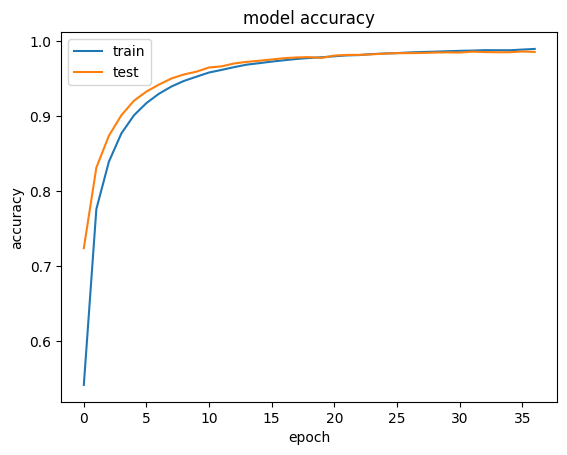

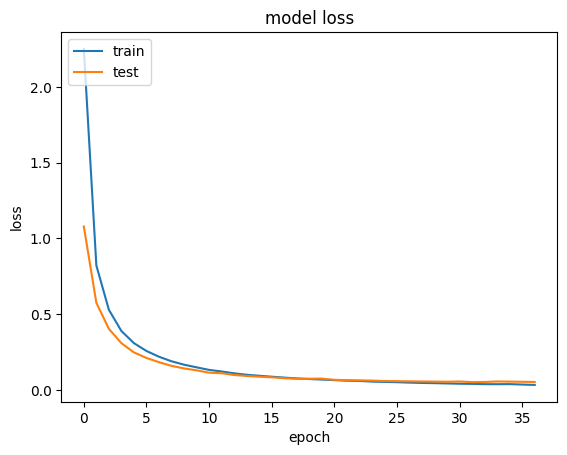

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_BiD.history['accuracy'])
plt.plot(training_history_BiD.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_BiD.history['loss'])
plt.plot(training_history_BiD.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Define a new function that relies on your new model to make predictions.

In [ ]:
#a function to save models.
def save_model(model, filename):
  model_json = model.to_json()
  with open(f"{filename}.json", "w") as json_file:
      json_file.write(model_json)
  model.save_weights(f"{filename}.h5")

In [ ]:
#loading model
model_BiD.load_weights("draft5_model_BiD_46_epochs.h5")

In [ ]:
model_BiD.save("EN_FR_Translator.h5")

In [ ]:
#Test Your Zaka
inputs = ["she is driving the truck", "he saw an old green truck", "she was driving the truck",
         "she was driving the car", "she was driving the red car", "she was driving the green car",
          "she went to her house", "she went to new jersey", "he went to new jersey"]

for input in inputs:
  print("ENG:\t"+input)
  FR_translation = EN_FR_Translator(input, FR_max, model_BiD, ENG_tokenizer, FR_tokenizer)
  print("FR:\t"+FR_translation)

ENG:	she is driving the truck
FR:	elle conduit le camion
ENG:	he saw an old green truck
FR:	il a vu le camion vert
ENG:	she was driving the truck
FR:	elle conduisait le camion
ENG:	she was driving the car
FR:	elle conduisait la voiture
ENG:	she was driving the red car
FR:	elle conduisait la voiture rouge
ENG:	she was driving the green car
FR:	elle conduisait la grande verte
ENG:	she went to her house
FR:	elle est allée en en
ENG:	she went to new jersey
FR:	elle est allée à new jersey
ENG:	he went to new jersey
FR:	il est allé à new jersey


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

In terms of architecture, we can

1.   Increase model size (number of hidden units, i.e. bigger thought vector) and depth (number of hidden layers).
2.   Do an Encoder-Decoder architecture with attention where the output states of the decoder and encoder are mixed together with a Bahdanau or Luong type attention.
3. Use a tranformer architecture with a multi-headed attention.
4. Use of pre-trained word embeddings such as Word2Vec and GloVe.

**What are some additional ways that we can do to improve the performance of our model?**

Additional ways are:
1. Use a larger dataset with a bigger vocabulary.
2. Maybe positional encoding of the vectors can help.
3. Transfer learning, fine tune pre-trained models.

##Extra: Deeper Model

The previous model was a simple layer and thus did not allow for a different input/output length.

The next model uses an 2 layers approach.

In [ ]:
def baseline_1D_ENCDEC_model(in_seq_length, out_seq_length, in_vocab_size, out_vocab_size):

  embedding_dim = 64
  convec_dim = 128
  # mask_zero=True indicates that the embedding layer should interpret the integer value 0 as a special "masking" value
  model = Sequential()
  model.add(Embedding(input_dim=in_vocab_size, output_dim=embedding_dim, input_length=in_seq_length, mask_zero=True))
  #encoder
  model.add(LSTM(convec_dim))
  #repeater
  '''
  - the tolist() method is important to transform the out_seq_length from class numpy.int64 to class int.
  - RepeatVector expects class int as an input.
  - RepeatVector takes a vector and repeats it n times.
  - The role of the RepeatVector layer is to take the contect vector of shape (batch_size, 1st LSTM units) and repeat it
    a number of times equal to the out_seq_length in order for the vector to be fed to each sequence of the next LSTM chain.
    The output vector has thus a shape of (batch_size, out_seq_length, 1st LSTM units)
  '''
  model.add(RepeatVector(out_seq_length.tolist()))
  #decoder
  model.add(LSTM(convec_dim, return_sequences=True))
  #classification
  model.add(TimeDistributed(Dense(out_vocab_size, activation = 'softmax')))
  #compile
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
#the +1 is to account for the <pad>
model_ENCDEC = baseline_1D_ENCDEC_model(ENG_max, FR_max, ENG_vocab_size+1, FR_vocab_size+1)
model_ENCDEC.summary()

21
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 15, 64)            12864     
                                                                 
 lstm_10 (LSTM)              (None, 128)               98816     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 21, 128)          0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 21, 128)           131584    
                                                                 
 time_distributed_3 (TimeDis  (None, 21, 331)          42699     
 tributed)                                                       
                                                                 
Total params: 285,963
Trainable params: 285,963
Non

In [ ]:
#now, we can use different lengths for input and output
trainX_ENCDEC = Encoder(ENG_tokenizer, ENG_max, df.iloc[:, 0])
trainY_ENCDEC = Encoder(FR_tokenizer, FR_max, df.iloc[:, 1])

print(trainX_ENCDEC.shape)
print(trainY_ENCDEC.shape)

(137860, 15)
(137860, 21)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
training_history_ENCDEC = model_ENCDEC.fit(trainX_ENCDEC, trainY_ENCDEC, batch_size=1024, epochs=100, validation_split=0.2, verbose=0, callbacks=[es])

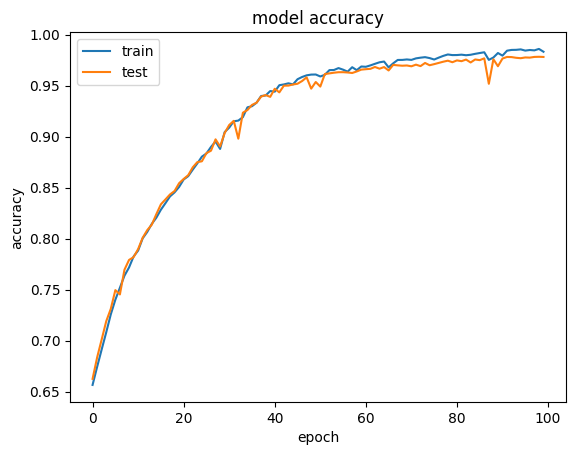

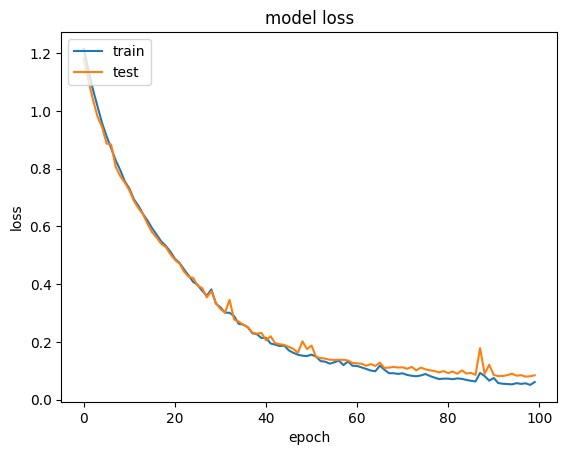

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_ENCDEC.history['accuracy'])
plt.plot(training_history_ENCDEC.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_ENCDEC.history['loss'])
plt.plot(training_history_ENCDEC.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
input = "she is driving the truck"

#Test Your Zaka
print(input)
FR_translation = EN_FR_Translator(input, ENG_max, model_ENCDEC, ENG_tokenizer, FR_tokenizer)
print(FR_translation)

she is driving the truck
elle conduit le camion vert


##Extra: BLEU-4 score on Train data

In [ ]:
def BLEU_4_score(reference, candidate):
  reference = reference.split()
  candidate = candidate.split()
  #reference should be a 2D list.
  score = sentence_bleu([reference], candidate)
  return score

In [ ]:
#generating few examples
for i in range(5):
  input = df['English'][i]
  reference = df['French'][i]
  print("ENG:\t"+input)
  FR_translation = EN_FR_Translator(input, FR_max, model_BiD, ENG_tokenizer, FR_tokenizer)
  print("FR:\t"+FR_translation)
  print('Ref:\t'+reference)
  print('BLEU score -> {}'.format(BLEU_4_score(reference, FR_translation)))

ENG:	new jersey is sometimes quiet during autumn  and it is snowy in april 
FR:	new jersey est parfois calme pendant l automne et il est neigeux en avril
Ref:	new jersey est parfois calme pendant l  automne  et il est neigeux en avril 
BLEU score -> 1.0
ENG:	the united states is usually chilly during july  and it is usually freezing in november 
FR:	les états unis est généralement froid en juillet et il gèle habituellement en novembre
Ref:	les états unis est généralement froid en juillet  et il gèle habituellement en novembre 
BLEU score -> 1.0
ENG:	california is usually quiet during march  and it is usually hot in june 
FR:	california est généralement calme en mars et il est généralement chaud en juin
Ref:	california est généralement calme en mars  et il est généralement chaud en juin 
BLEU score -> 1.0
ENG:	the united states is sometimes mild during june  and it is cold in september 
FR:	les états unis est parfois légère en juin et il fait froid en septembre
Ref:	les états unis est p

In [ ]:
#computing and storing BLEU score for each translation
BLEU4 = []
s = df.shape[0]//20
for i in range(s):
  input = df['English'][i]
  reference = df['French'][i]
  FR_translation = EN_FR_Translator(input, FR_max, model_BiD, ENG_tokenizer, FR_tokenizer)
  BLEU4.append(BLEU_4_score(reference, FR_translation))

In [ ]:
bleu_df= df.iloc[:s,:].copy()
bleu_df['BLEU-4'] = BLEU4
bleu_df.head()
#df.to_csv()

,English,French,ENG Length,FR Length,BLEU-4
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automn...,13,14,1.0
1,the united states is usually chilly during jul...,les états unis est généralement froid en juill...,15,14,1.0
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13,1.0
3,the united states is sometimes mild during jun...,les états unis est parfois légère en juin et ...,14,14,1.0
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14,1.0


<Axes: xlabel='FR Length', ylabel='BLEU-4'>

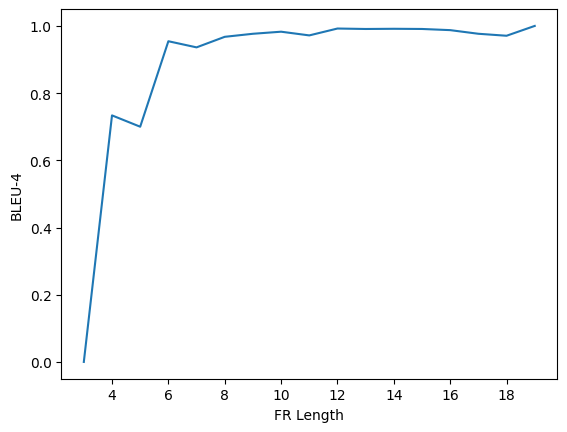

In [ ]:
average = bleu_df.iloc[:,-2:]

sns.lineplot(data=average.groupby(by=['FR Length']).mean(), x='FR Length', y='BLEU-4')

##Extra: EDA

In [ ]:
def plot_counts_from_tokenizer(tokenizer, max_num):

  sorted_dict = sorted(tokenizer.word_counts.items(), reverse=True, key=lambda x: x[1])
  x = [sorted_dict[i][0] for i in range(max_num)]
  y = [sorted_dict[i][1] for i in range(max_num)]
  plt.figure()
  sns.barplot(x=x, y=y)
  plt.xticks(rotation=90)
  plt.title(f'{max_num} most frequent words')
  plt.xlabel('Word')

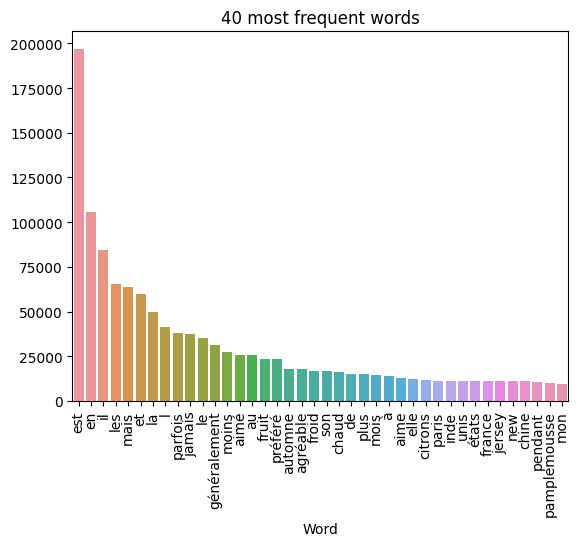

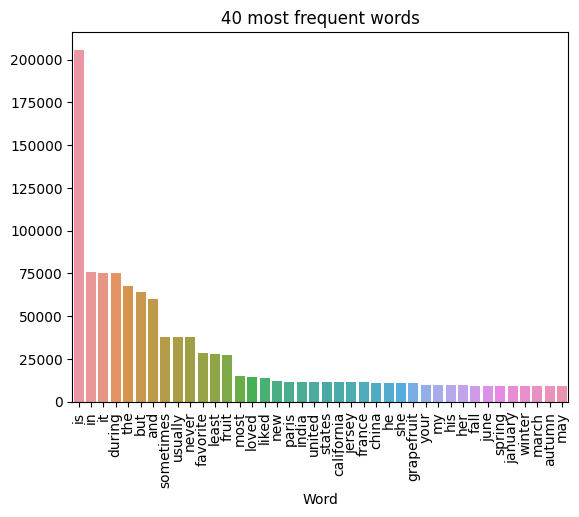

In [ ]:
i_max = 40 #number of words to display
plot_counts_from_tokenizer(FR_tokenizer, i_max)
plot_counts_from_tokenizer(ENG_tokenizer, i_max)